<a href="https://colab.research.google.com/github/nxxk23/AI-Engineer/blob/main/fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**illness_type**

```
ประเภทการเคลม ตัวอย่าง
ACC = อุบัติเหตุ
ILL  = เจ็บป่วย
DAY = Day case (AIA)
PRE-ACC = อุบัติเหตุ-Pre Auth (AIA)
PRE-ILL = เจ็บป่วย-Pre Auth (AIA)
```

**insurance**

```
ชื่อประกัน
aia = เอไอเอ
mtl = เมืองไทยประกันชีวิต
tli = ไทยประกันชีวิต
plt = พรูเด็นเชียลประกันชีวิต
tmlth = โตเกียวมารีนประกันชีวิต
fwd = เอฟดับบลิวดีประกันชีวิต
oli = ไทยสมุทร ประกันชีวิต
bla = กรุงเทพ ประกันชีวิต
pchi = แปซิฟิคครอส
tlig = ไทยประกันกลุ่ม
tqc = tqc
nir = สวัสดิการบริษัทเอกชน
```

# import data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [57]:
import pandas as pd

opd = pd.read_csv('/content/drive/MyDrive/AIEngineer/fraud/opd_discharge_August_2024.csv')
diag = pd.read_csv('/content/drive/MyDrive/AIEngineer/fraud/diagnosis.csv')

In [58]:
diag = diag.drop(columns=['Unnamed: 0','updated_at','seq'])

In [70]:
opd

,id,seq,created_at,updated_at,deleted_at,service_setting,illnes_type,policy_type,cid,cid_type,...,invoice_no,remark,created_submit_by,updated_submit_by,created_submit_at,updated_submit_at,other_insurer,is_check_claim_balance,is_reimbursement,epayment_id
0,5ac01d28-649e-45f1-bd6c-28bef03177fd,1723362821876838256,2024-08-11 14:53:41.876 +0700,2024-09-01 01:03:48.499 +0700,NaN,OPD,ILL,CS,3510600017435,NATIONAL_ID,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,N,4f632ac4-ca8e-4f0e-8c8d-7ed56a984f37
1,a58ad61f-5b33-4429-986a-c382d5f23a50,1725096090864466167,2024-08-31 16:21:30.864 +0700,2024-09-01 01:03:36.471 +0700,NaN,OPD,ACC,IB,3101202037015,NATIONAL_ID,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,N,1f43a222-41bf-45b2-8ed6-975488de9f2f
2,6fd19ff2-7795-48f4-8d88-489480e2bfbe,1725002199712584475,2024-08-30 14:16:39.712 +0700,2024-09-01 01:02:13.640 +0700,NaN,OPD,ILL,CS,1100700853593,NATIONAL_ID,...,3167230668,NaN,299cdc89-c705-40fa-b6a6-97f0a8f4e7f4,NaN,2024-09-17 13:19:53.204 +0700,NaN,False,NaN,N,8eee2860-bbf8-4f67-b22e-623b0cfe5dab
3,70e37d78-2db3-40f0-a139-e46d353466b0,1724063329282619820,2024-08-19 17:28:49.282 +0700,2024-09-01 01:02:32.927 +0700,NaN,OPD,ILL,CS,1102001744428,NATIONAL_ID,...,O13-6708-30159,NaN,NaN,NaN,NaN,NaN,False,NaN,N,10469d3c-a44c-42ab-ad39-e28f17a290d8
4,ecd8eec0-86b0-4ed1-a75f-6e724079fa73,1725001867113543084,2024-08-30 14:11:07.113 +0700,2024-09-01 01:02:13.640 +0700,NaN,OPD,ILL,CS,1103701107367,NATIONAL_ID,...,3167230670,NaN,299cdc89-c705-40fa-b6a6-97f0a8f4e7f4,NaN,2024-09-17 13:20:32.262 +0700,NaN,False,NaN,N,8eee2860-bbf8-4f67-b22e-623b0cfe5dab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54928,b08dc9a0-d0d9-446e-953c-6258d94bc441,1724156052825424332,2024-08-20 19:14:12.825 +0700,2024-09-01 01:01:58.572 +0700,NaN,OPD,ACC,CS,1100400063830,NATIONAL_ID,...,co-67-043129,NaN,58384171-7baa-4822-9250-65d63f194154,NaN,2024-09-06 16:13:19.878 +0700,NaN,False,NaN,N,6633e316-6d71-4f5b-b41c-ed10fde7ccef
54929,ded0693c-bee2-4b71-8633-0e63377f3ec6,1724165331195994020,2024-08-20 21:48:51.196 +0700,2024-09-01 01:01:58.572 +0700,NaN,OPD,ILL,IB,1749900148012,NATIONAL_ID,...,co-67-,NaN,58384171-7baa-4822-9250-65d63f194154,NaN,2024-09-06 16:15:39.739 +0700,NaN,False,NaN,N,6633e316-6d71-4f5b-b41c-ed10fde7ccef
54930,adb6c00b-530b-4c29-b3da-7e5522085b8e,1724198777748432307,2024-08-21 07:06:17.748 +0700,2024-09-01 01:01:58.572 +0700,NaN,OPD,ACC,IB,3759900231706,NATIONAL_ID,...,co-67-043031,NaN,58384171-7baa-4822-9250-65d63f194154,NaN,2024-09-06 16:16:57.144 +0700,NaN,False,NaN,N,6633e316-6d71-4f5b-b41c-ed10fde7ccef
54931,4290f566-004a-44f4-96bb-471994ce2835,1722505871463475160,2024-08-01 16:51:11.463 +0700,2024-09-01 01:01:53.343 +0700,NaN,OPD,ILL,IB,1200601639479,NATIONAL_ID,...,2193076,NaN,3107f60d-c3a5-40c0-8eba-0b6c3f8dd55b,NaN,2024-09-07 09:43:59.468 +0700,NaN,False,NaN,NaN,b5f76508-f23b-4ab4-ba3f-0333eacc62f9


In [59]:
diag.head()

,icd10,dx_name,dx_type,cid,id,created_at,dx_free_text,chief_complaint,claim_status,hospital_code,insurance,total_bill_amount
0,E109,"Type 1 diabetes mellitus, without complications",PP,3510600017435,5ac01d28-649e-45f1-bd6c-28bef03177fd,2024-08-11 14:53:41.876 +0700,เบาหวาน ไขมัน,เบาหวาน ไขมัน,Received,11720,aia,1800.0
1,E785,"Hyperlipidaemia, unspecified",PP,3510600017435,5ac01d28-649e-45f1-bd6c-28bef03177fd,2024-08-11 14:53:41.876 +0700,เบาหวาน ไขมัน,เบาหวาน ไขมัน,Received,11720,aia,1800.0
2,S711,Open wound of thigh,PP,3101202037015,a58ad61f-5b33-4429-986a-c382d5f23a50,2024-08-31 16:21:30.864 +0700,Open wound of thigh,ขาขวากระแทกประตู 09.30 น \r\nไม่แพ้ยา,Approve,11787,aia,4358.0
3,W220,Striking against or struck by other object(s) ...,EC,3101202037015,a58ad61f-5b33-4429-986a-c382d5f23a50,2024-08-31 16:21:30.864 +0700,Open wound of thigh,ขาขวากระแทกประตู 09.30 น \r\nไม่แพ้ยา,Approve,11787,aia,4358.0
4,T793,"Post-traumatic wound infection, not elsewhere ...",PP,1100700853593,6fd19ff2-7795-48f4-8d88-489480e2bfbe,2024-08-30 14:16:39.712 +0700,อักเสบติดเชื้อข้อเท้าขวา,ติดตามอาการหลังผ่าตัด,Submit,14354,aia,1000.0


In [54]:
import pandas as pd
filtered_opd = opd[(opd['illnes_type'].isin(['ACC', 'ILL'])) & (opd['claim_status'].isin(['Approve', 'Decline']))]
result = filtered_opd.groupby(['insurance', 'illnes_type', 'claim_status']).size().unstack(fill_value=0)
result

claim_status           Approve  Decline
insurance illnes_type                  
aia       ACC             1120        9
          ILL             1462       58
bla       ACC                1        0
          ILL                0        1
fwd       ACC              191        1
          ILL             2802        7
mtl       ACC             1132        9
          ILL             7670       26
oli       ACC                2        0
          ILL                3        0
plt       ILL                8        0
tli       ACC              754       15
          ILL              257       57
tmlth     ACC                1        0
          ILL                9        0

### **bill pipe**

In [4]:
import json

def load_billing_data(opd, index):
    billing_initial = opd['billing'][index]  # Extract billing data from a specific row
    return json.loads(billing_initial)  # Parse JSON data and return as a list

def process_billing_data(bill_list, max_length=100):
    total_billing_amount_after_discount = 0.0
    processed_bills = []
    for bill in bill_list:
        local_billing_name = bill.get('local_billing_name', 'N/A')
        if len(local_billing_name) > max_length:
            local_billing_name = local_billing_name[:max_length - 1] + "..."  # Truncate if needed

        billing_amount = float(bill['billing_initial'])  # Convert billing amount to float
        billing_discount = float(bill['billing_discount'])  # Convert discount to float
        effective_amount = billing_amount - billing_discount
        total_billing_amount_after_discount += effective_amount
        processed_bills.append({
            'local_billing_name': local_billing_name,
            'billing_amount': billing_amount,
            'billing_discount': billing_discount,
            'effective_amount': effective_amount
        })

    return processed_bills, total_billing_amount_after_discount
def display_billing_data(processed_bills):
    print(f"{'Local Billing Name':<45}\t{'Billing Amount':<20}\t{'Discount':<20}")  # Adjust spacing as needed
    print("-" * 80)  # Separator line for clarity
    for bill in processed_bills:
        print(f"{bill['local_billing_name']:<45}\t{bill['billing_amount']:<20}\t{bill['billing_discount']:<20}")
def display_total_billing_amount(total_billing_amount_after_discount):
    print("\nTotal Billing Amount After Discounts:")
    print(f"{total_billing_amount_after_discount:.2f}")
def billing_pipeline(opd, index, max_length=100):
    bill_list = load_billing_data(opd, index)
    processed_bills, total_billing_amount_after_discount = process_billing_data(bill_list, max_length)
    display_billing_data(processed_bills)
    display_total_billing_amount(total_billing_amount_after_discount)

In [ ]:
# Example usage
decline_bill = billing_pipeline(opd, index=1707, max_length=100)
decline_bill

Local Billing Name                           	Billing Amount      	Discount            
--------------------------------------------------------------------------------
Outpatient Medication   ค่ายาผู้ป่วยนอก      	60.0                	0.0                 
Medical Supplies 1   เวชภัณฑ์1               	16.0                	0.0                 
Nursing and Midwifery Charge   ค่าบริการพยาบาล	67.0                	0.0                 
Other Medical Service Charge ค่าบริการทางการแพทย์	89.0                	0.0                 
First Outpatient care before admission  ค่าแพทย์ตรวจรักษาครั้งแรก	249.0               	0.0                 
General Medical Equipment  ค่าอุปกรณ์นอกห้องผ่าตัด	223.0               	0.0                 
Physician Procedures  ค่าแพทย์ศัลยกรรม  หัตถการผ่าตัด	745.0               	0.0                 

Total Billing Amount After Discounts:
1449.00


### **diag pipe**

In [5]:
import json

# Step 1: Extract Diagnosis Data
def load_diagnosis_data(decline, index):
    diagnosis_data = decline['diagnosis'].iloc[index]  # Extract diagnosis data from a specific row
    return json.loads(diagnosis_data)  # Parse JSON data and return as a list

# Step 2: Process Diagnosis Data
def process_diagnosis_data(diagnosis_list):
    processed_diagnoses = []
    for diagnosis in diagnosis_list:
        icd10 = diagnosis.get('icd10', 'N/A')
        dx_name = diagnosis.get('dx_name', 'N/A')
        processed_diagnoses.append({
            'icd10': icd10,
            'dx_name': dx_name
        })
    return processed_diagnoses

# Step 3: Display Diagnosis Data
def display_diagnosis_data(processed_diagnoses):
    print(f"{'ICD-10':<10}\t{'Diagnosis Name':<50}")  # Adjust spacing as needed
    print("-" * 60)  # Separator line for clarity

    # Display each diagnosis
    for diagnosis in processed_diagnoses:
        print(f"{diagnosis['icd10']:<10}\t{diagnosis['dx_name']:<50}")

# Step 4: Combine All Steps into a Pipeline
def diagnosis_pipeline(decline, index):
    diagnosis_list = load_diagnosis_data(decline, index)
    processed_diagnoses = process_diagnosis_data(diagnosis_list)
    display_diagnosis_data(processed_diagnoses)


In [ ]:
# Example usage
decline_diag = diagnosis_pipeline(opd, index=54799)
decline_diag

ICD-10    	Diagnosis Name                                    
------------------------------------------------------------
R50.9     	Fever, unspecified                                


In [6]:
decline = opd[opd['claim_status']=='Decline']
approve = opd[opd['claim_status']=='Approve']
data = pd.concat([decline,approve])
data.head()

,id,seq,created_at,updated_at,deleted_at,service_setting,illnes_type,policy_type,cid,cid_type,...,invoice_no,remark,created_submit_by,updated_submit_by,created_submit_at,updated_submit_at,other_insurer,is_check_claim_balance,is_reimbursement,epayment_id
334,4185a125-c197-43d3-8022-184b49884543,1725018450839014942,2024-08-30 18:47:30.839 +0700,2024-09-01 01:03:12.063 +0700,NaN,OPD,ACC,IB,3300800217090,NATIONAL_ID,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,N,fd5fbb30-9770-44d0-acdc-e05726cc9d9c
619,58a345dd-a0e0-42b1-bcd5-bd242721e001,1723203987657768132,2024-08-09 18:46:27.657 +0700,2024-09-01 01:03:26.350 +0700,NaN,OPD,ILL,CS,1209001132029,NATIONAL_ID,...,09-67042573,NaN,NaN,NaN,NaN,NaN,False,NaN,N,5b9e39e6-fa30-49ca-8fa4-9cb0793da4ad
882,5a7cfd34-6f87-492a-8b62-78e6d6d90c56,1725104640018846721,2024-08-31 18:44:00.018 +0700,2024-09-01 01:00:55.062 +0700,NaN,OPD,ACC,CS,3301000446966,NATIONAL_ID,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,N,6b223328-7a2a-475c-8f64-946e35325432
979,2c4040ad-a73c-441a-97fd-8ed4ec2d18c7,1724148417306298253,2024-08-20 17:06:57.306 +0700,2024-09-01 01:02:16.163 +0700,NaN,OPD,ILL,IB,2800700019374,NATIONAL_ID,...,PO 2024/081433,NaN,NaN,NaN,NaN,NaN,False,NaN,N,ac1a613f-68ae-4385-a4a6-40bef37728bb
1209,66772bed-ff78-4ac6-bfda-f4de2cdf1cdf,1722839516191960112,2024-08-05 13:31:56.192 +0700,2024-09-01 01:03:47.031 +0700,NaN,OPD,ACC,IB,1102003216933,NATIONAL_ID,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,N,122ba1b9-28fc-4a06-a4fd-772def3dd9d4


## **insurance vs icd10**

> **จากตารางนี้ คุณสามารถวิเคราะห์ได้ว่าประกันใดไม่รับโรคใดบ้าง**
```
0: หมายความว่าประกันนั้นๆ ไม่ได้ปฏิเสธการเรียกร้องสำหรับโรคนี้
1: หมายความว่าประกันนั้นๆ ปฏิเสธการเรียกร้องสำหรับโรคนี้
หากมีค่ามากกว่า 1 (เช่น 3 ในกรณีของ Z501 ในประกัน tli) หมายความว่ามีการปฏิเสธการเรียกร้องสำหรับโรคนี้ถึง 3 ครั้งในกรณีนี้
```

**เราสามารถวิเคราะห์ว่า แต่ละโรค (ICD10) ถูกปฏิเสธหรืออนุมัติจากประกันอะไรบ้าง**
```
เฉพาะเคสที่ผู้ป่วยได้เคลมโดยใช้ประกันนั้นจริง. คุณสามารถทำ pivot_table หรือ cross-tabulation เพื่อตรวจสอบว่า ประกันใดปฏิเสธโรคไหน.
```

In [68]:
import pandas as pd

diag_filtered = diag[(diag['claim_status'] == 'Approve') | (diag['claim_status'] == 'Decline')]
# กรองข้อมูลเฉพาะกรณีที่ถูกปฏิเสธ (Decline)
diag_decline = diag_filtered[diag_filtered['claim_status'] == 'Decline']
# สร้าง pivot table เพื่อดูว่าแต่ละโรคถูกปฏิเสธโดยประกันใดบ้าง
decline_insurance = diag_decline.pivot_table(index='icd10', columns='insurance', values='claim_status', aggfunc='size', fill_value=0)
# Reset index เพื่อแสดงตารางในรูปแบบที่อ่านง่ายขึ้น
decline_insurance_reset = decline_insurance.reset_index()
# ตารางนี้จะบอกให้คุณทราบว่าโรคไหนถูกปฏิเสธจากประกันใดบ้าง และบ่อยแค่ไหน.
decline_insurance_reset

insurance,icd10,aia,bla,fwd,mtl,tli
0,A049,0,0,0,0,1
1,A08.3,0,0,0,0,1
2,A083,1,0,0,0,0
3,A099,0,0,0,0,1
4,A78,0,0,0,0,1
...,...,...,...,...,...,...
176,Z424,1,0,0,0,0
177,Z48,1,0,0,0,1
178,Z488,0,0,0,0,1
179,Z489,0,0,0,0,1


In [71]:
decline_insurance_reset[decline_insurance_reset['icd10']=='I99']

insurance,icd10,aia,bla,fwd,mtl,tli
35,I99,1,0,0,0,0


In [73]:
decline_insurance_reset[decline_insurance_reset['aia']==4]

insurance,icd10,aia,bla,fwd,mtl,tli
36,J00,4,0,0,0,0


In [76]:
diag_filtered[diag_filtered['icd10']=='J00']['claim_status'].value_counts()

,count
claim_status,
Approve,281
Decline,4


## โรค(J00)เดียวกัน ประกัน (aia) เดียวกัน เบิกได้ 111 ครั้ง เบิกไม่ได้ 4 ครั้ง

In [87]:
b = diag_filtered[(diag_filtered['icd10'] == 'J00') & (diag_filtered['claim_status'] == 'Decline') & (diag_filtered['insurance'] == 'aia')]
b

,icd10,dx_name,dx_type,cid,id,created_at,dx_free_text,chief_complaint,claim_status,hospital_code,insurance,total_bill_amount
25954,J00,Acute nasopharyngitis [common cold],PP,1229901815335,7ab50994-6eee-461e-ac3a-a21a98469a95,2024-08-11 11:17:48.105 +0700,Acute nasopharyngitis [common cold],ไข้ ไอ น้ำมูก,Decline,11874,aia,959.0
40729,J00,Acute nasopharyngitis [common cold],PP,1859900544731,bcd6e8d2-c869-4bbb-bc22-9ec999308d93,2024-08-31 15:26:12.261 +0700,-,-,Decline,14534,aia,1565.0
40792,J00,Acute nasopharyngitis [common cold],PP,1869901177899,758bc3c3-5d5b-4b9b-8c25-d5f09b224945,2024-08-20 15:21:22.699 +0700,-,-,Decline,14534,aia,1000.0
41707,J00,Acute nasopharyngitis [common cold],PP,1859900544731,e97d3e11-f809-46ec-8256-73d8696658eb,2024-08-15 09:52:14.778 +0700,-,-,Decline,14534,aia,1340.0


In [104]:
opd[opd['cid']=='1859900544731'][['total_bill_amount','billing','order_item','diagnosis','claim_status','insurance','created_at']]

,total_bill_amount,billing,order_item,diagnosis,claim_status,insurance,created_at
30349,1565.0,"[{""billing_initial"": ""1045.00"", ""billing_disco...",[],"[{""icd10"": ""J00"", ""dx_name"": ""Acute nasopharyn...",Decline,aia,2024-08-31 15:26:12.261 +0700
31042,1340.0,"[{""billing_initial"": ""820.00"", ""billing_discou...",[],"[{""icd10"": ""J00"", ""dx_name"": ""Acute nasopharyn...",Decline,aia,2024-08-15 09:52:14.778 +0700


In [106]:
json.loads(opd[opd['cid']=='1102004836293']['billing'].iloc[0])

[{'billing_initial': '1033.00',
  'billing_discount': '103.00',
  'simb_billing_code': '1.1.1(3)',
  'billing_net_amount': '930.00',
  'local_billing_name': 'Outpatient Medication   ค่ายาผู้ป่วยนอก'},
 {'billing_initial': '8.00',
  'billing_discount': '0.00',
  'simb_billing_code': '1.1.2(1)',
  'billing_net_amount': '8.00',
  'local_billing_name': 'Medical Supplies 1   เวชภัณฑ์1'},
 {'billing_initial': '1180.00',
  'billing_discount': '0.00',
  'simb_billing_code': '1.1.4',
  'billing_net_amount': '1180.00',
  'local_billing_name': 'Laboratory Investigation and Pathology  ค่าตรวจทางเทคนิค พยาธิวิทยา'},
 {'billing_initial': '185.00',
  'billing_discount': '0.00',
  'simb_billing_code': '1.1.12',
  'billing_net_amount': '185.00',
  'local_billing_name': 'Nursing and Midwifery Charge   ค่าบริการพยาบาล'},
 {'billing_initial': '185.00',
  'billing_discount': '0.00',
  'simb_billing_code': '1.1.14(2)',
  'billing_net_amount': '185.00',
  'local_billing_name': 'Other Medical Service Charge ค

In [85]:
diag_filtered[(diag_filtered['icd10'] == 'J00') & (diag_filtered['claim_status'] == 'Approve') & (diag_filtered['insurance'] == 'aia')]

,icd10,dx_name,dx_type,cid,id,created_at,dx_free_text,chief_complaint,claim_status,hospital_code,insurance,total_bill_amount
242,J00,Acute nasopharyngitis [common cold],PP,1102004836293,1bdadee5-1e9a-4fec-b703-2fb80752903c,2024-08-19 19:58:52.903 +0700,ข้หวัด คออักเสบ,ไข้,Approve,11787,aia,2988.0
322,J00,Acute nasopharyngitis [common cold],PP,3102000763808,7ba8b798-c9de-4c4b-b590-f1e98adc2245,2024-08-11 16:01:55.815 +0700,ข้หวัด คออักเสบ,คอบวม ไทรอยด์,Approve,11787,aia,1500.0
1674,J00,Acute nasopharyngitis [common cold],PP,1129902725811,3790c54f-e9a5-4d4a-8595-e626d46e5a44,2024-08-10 18:32:35.560 +0700,ข้หวัด คออักเสบ,หวัด,Approve,11787,aia,1000.0
1815,J00,Acute nasopharyngitis [common cold],PP,3570700674365,9f16e137-aaa6-407e-bbae-9348ac6e59d4,2024-08-21 11:30:43.358 +0700,J00 Acute nasopharyngitis [common cold],ไข้,Approve,12026,aia,2000.0
1925,J00,Acute nasopharyngitis [common cold],PP,1128600025246,de1f763f-b939-4dcc-bd8e-a98d724f59d5,2024-08-27 15:29:32.731 +0700,ข้หวัด คออักเสบ,ไอ,Approve,11787,aia,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
72777,J00,Acute nasopharyngitis [common cold],PP,1770401402357,e440c7aa-49ab-4a44-88b5-433293e60d1d,2024-08-24 16:33:12.122 +0700,-,-,Approve,14534,aia,3773.0
72782,J00,Acute nasopharyngitis [common cold],PP,1869600008257,58141fed-2d21-4f86-9d4b-4859052bb772,2024-08-22 10:39:58.773 +0700,-,-,Approve,14534,aia,800.0
72804,J00,Acute nasopharyngitis [common cold],PP,1103705740994,0cca8030-c445-43c7-bd7f-fb91353cab95,2024-08-17 19:43:59.307 +0700,-,-,Approve,14534,aia,774.0
72810,J00,Acute nasopharyngitis [common cold],PP,1869901069395,897f78d5-ba02-4355-bf32-5f5b604b3d09,2024-08-17 09:20:09.894 +0700,-,-,Approve,14534,aia,1490.0


In [40]:
import pandas as pd

diag_filtered = diag[(diag['claim_status'] == 'Approve') | (diag['claim_status'] == 'Decline')]
diag_filtered = diag_filtered[diag_filtered['claim_status'] == 'Decline']
decline_insurance = diag_filtered.pivot_table(index='icd10', columns='insurance', values='claim_status',
                                         aggfunc='size', fill_value=0)
d = decline_insurance.reset_index()

diag_filtered = diag[diag['claim_status'] == 'Approve']
approve_insurance = diag_filtered.pivot_table(index='icd10', columns='insurance', values='claim_status',
                                         aggfunc='size', fill_value=0)
a = approve_insurance.reset_index()

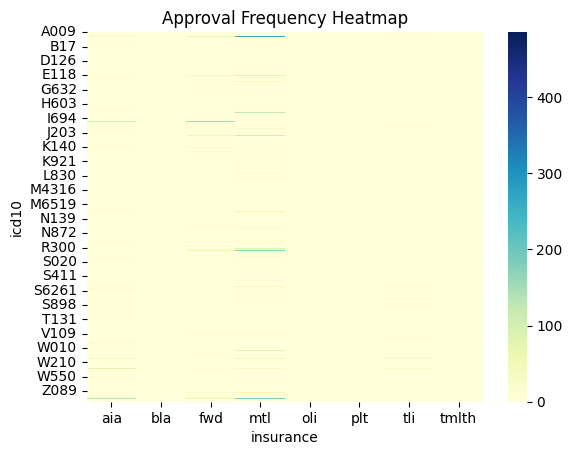

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# หรือทำการ Heatmap เพื่อดูความถี่ของการอนุมัติในแต่ละ ICD10 และแต่ละประกัน
sns.heatmap(approve_insurance, cmap="YlGnBu", annot=False)
plt.title('Approval Frequency Heatmap')
plt.show()


In [14]:
diag_filtered = diag[(diag['claim_status'] == 'Approve') | (diag['claim_status'] == 'Decline')]
diag_filtered['claim_status'].value_counts()

,count
claim_status,
Approve,19800
Decline,228


In [49]:
result = filtered_opd.groupby(['insurance', 'illnes_type', 'claim_status']).size().unstack(fill_value=0)
result

claim_status           Approve  Decline
insurance illnes_type                  
aia       ACC             1120        9
          ILL             1462       58
bla       ACC                1        0
          ILL                0        1
fwd       ACC              191        1
          ILL             2802        7
mtl       ACC             1132        9
          ILL             7670       26
oli       ACC                2        0
          ILL                3        0
plt       ILL                8        0
tli       ACC              754       15
          ILL              257       57
tmlth     ACC                1        0
          ILL                9        0

In [15]:
import pandas as pd
diag_filtered = diag[(diag['claim_status'] == 'Approve') | (diag['claim_status'] == 'Decline')]
grouped = diag_filtered.groupby(['icd10', 'claim_status']).size().reset_index(name='count')
pivot_table = grouped.pivot(index='icd10', columns='claim_status', values='count').fillna(0)
pivot_table = pivot_table.astype(int)
pivot_table

claim_status,Approve,Decline
icd10,,
A009,1,0
A010,3,0
A020,5,0
A029,1,0
A04.9,1,0
...,...,...
Z952,3,0
Z955,1,0
Z958,1,0


In [10]:
diag.head()

,icd10,dx_name,dx_type,cid,id,seq,created_at,updated_at,dx_free_text,chief_complaint,claim_status,hospital_code,insurance,total_bill_amount
0,E109,"Type 1 diabetes mellitus, without complications",PP,3510600017435,5ac01d28-649e-45f1-bd6c-28bef03177fd,1723362821876838256,2024-08-11 14:53:41.876 +0700,2024-09-01 01:03:48.499 +0700,เบาหวาน ไขมัน,เบาหวาน ไขมัน,Received,11720,aia,1800.0
1,E785,"Hyperlipidaemia, unspecified",PP,3510600017435,5ac01d28-649e-45f1-bd6c-28bef03177fd,1723362821876838256,2024-08-11 14:53:41.876 +0700,2024-09-01 01:03:48.499 +0700,เบาหวาน ไขมัน,เบาหวาน ไขมัน,Received,11720,aia,1800.0
2,S711,Open wound of thigh,PP,3101202037015,a58ad61f-5b33-4429-986a-c382d5f23a50,1725096090864466167,2024-08-31 16:21:30.864 +0700,2024-09-01 01:03:36.471 +0700,Open wound of thigh,ขาขวากระแทกประตู 09.30 น \r\nไม่แพ้ยา,Approve,11787,aia,4358.0
3,W220,Striking against or struck by other object(s) ...,EC,3101202037015,a58ad61f-5b33-4429-986a-c382d5f23a50,1725096090864466167,2024-08-31 16:21:30.864 +0700,2024-09-01 01:03:36.471 +0700,Open wound of thigh,ขาขวากระแทกประตู 09.30 น \r\nไม่แพ้ยา,Approve,11787,aia,4358.0
4,T793,"Post-traumatic wound infection, not elsewhere ...",PP,1100700853593,6fd19ff2-7795-48f4-8d88-489480e2bfbe,1725002199712584475,2024-08-30 14:16:39.712 +0700,2024-09-01 01:02:13.640 +0700,อักเสบติดเชื้อข้อเท้าขวา,ติดตามอาการหลังผ่าตัด,Submit,14354,aia,1000.0


# hospital

## case 1

In [7]:
data[data['cid']=='3102000763808'][['created_at','billing','total_bill_amount','claim_status','insurance','diagnosis','order_item','icd9']]

,created_at,billing,total_bill_amount,claim_status,insurance,diagnosis,order_item,icd9
12760,2024-08-08 14:46:10.057 +0700,"[{""billing_initial"": ""713.00"", ""billing_discou...",1500.0,Decline,aia,"[{""icd10"": ""E041"", ""dx_name"": ""Nontoxic single...","[{""initial"": ""523"", ""item_id"": ""0107E01A0500L0...",[]
256,2024-08-11 16:01:55.815 +0700,"[{""billing_initial"": ""533"", ""billing_discount""...",1500.0,Approve,aia,"[{""icd10"": ""J00"", ""dx_name"": ""Acute nasopharyn...","[{""initial"": ""533"", ""item_id"": ""0513I02D0015O0...",[]


In [87]:
opd[opd['cid']=='3101501495945'][['created_at','billing','total_bill_amount','claim_status','insurance','diagnosis','order_item','icd9']]

,created_at,billing,total_bill_amount,claim_status,insurance,diagnosis,order_item,icd9
48757,2024-08-21 11:37:41.084 +0700,"[{""billing_initial"": ""0.00"", ""billing_discount...",725.0,Approve,aia,"[{""icd10"": ""E041"", ""dx_name"": ""Nontoxic single...","[{""initial"": ""0"", ""item_id"": ""A001"", ""discount...",[]


In [57]:
json.loads(opd[opd['cid']=='3102000763808']['diagnosis'].iloc[0]) # ป่วยไข้หวัดใหญ่ เบิกได้

[{'icd10': 'J00',
  'dx_name': 'Acute nasopharyngitis [common cold]',
  'dx_type': 'PP'}]

In [88]:
json.loads(opd[opd['cid']=='3102000763808']['order_item'].iloc[1]) #เนื้องอกต่อมไทรอยด์ เบิกไม่ได้

[{'initial': '523',
  'item_id': '0107E01A0500L02',
  'discount': '52',
  'item_name': 'Amoxy ๕๐๐ mg',
  'net_amount': '471.00',
  'item_amount': '28',
  'simb_billing_code': '1.1.1(3)',
  'local_billing_code': '50',
  'local_billing_name': 'Outpatient Medication   ค่ายาผู้ป่วยนอก'},
 {'initial': '190',
  'item_id': '0104B04T0500O06',
  'discount': '19',
  'item_name': '==500 mg==Tylenol',
  'net_amount': '171.00',
  'item_amount': '20',
  'simb_billing_code': '1.1.1(3)',
  'local_billing_code': '50',
  'local_billing_name': 'Outpatient Medication   ค่ายาผู้ป่วยนอก'},
 {'initial': '58',
  'item_id': '2041GLOVSTNP00M',
  'discount': '0',
  'item_name': 'GLOVE # M ไม่มีแป้ง.(ศรีตรังกล่องเขียว)',
  'net_amount': '58.00',
  'item_amount': '1',
  'simb_billing_code': '1.1.2(1)',
  'local_billing_code': '70',
  'local_billing_name': 'Medical Supplies 1   เวชภัณฑ์1'},
 {'initial': '300',
  'item_id': 'DF1',
  'discount': '0',
  'item_name': 'DF แพทย์ตรวจรักษา (Doctor Fee)',
  'net_amount': '3

## case2

In [92]:
opd[opd['id']=='0847f51f-b196-4845-988e-3e5f8f4ac475'][['cid','created_at','billing','total_bill_amount','claim_status','insurance','diagnosis','order_item','icd9']]

,cid,created_at,billing,total_bill_amount,claim_status,insurance,diagnosis,order_item,icd9
12307,1129902711038,2024-08-14 15:25:21.122 +0700,"[{""billing_initial"": ""185"", ""billing_discount""...",1224.0,Decline,tli,"[{""icd10"": ""B974"", ""dx_name"": ""Respiratory syn...","[{""initial"": ""185"", ""item_id"": ""NSE"", ""discoun...",[]


In [101]:
opd[opd['cid']=='1102900295693'][['cid','created_at','billing','total_bill_amount','claim_status','insurance','diagnosis','order_item','icd9']]

,cid,created_at,billing,total_bill_amount,claim_status,insurance,diagnosis,order_item,icd9
31776,1102900295693,2024-08-25 19:58:14.809 +0700,"[{""billing_initial"": ""185"", ""billing_discount""...",1500.0,Approve,mtl,"[{""icd10"": ""J050"", ""dx_name"": ""Acute obstructi...","[{""initial"": ""185"", ""item_id"": ""NSE"", ""discoun...",[]
32313,1102900295693,2024-08-26 19:03:45.903 +0700,"[{""billing_initial"": ""691.00"", ""billing_discou...",1500.0,Approve,mtl,"[{""icd10"": ""B974"", ""dx_name"": ""Respiratory syn...","[{""initial"": ""225"", ""item_id"": ""0303C05R1000M0...",[]
42794,1102900295693,2024-08-29 08:35:53.507 +0700,"[{""billing_initial"": ""222.00"", ""billing_discou...",1500.0,Approve,mtl,"[{""icd10"": ""B974"", ""dx_name"": ""Respiratory syn...","[{""initial"": ""8"", ""item_id"": ""2056THERET00000""...",[]
48643,1102900295693,2024-08-31 12:13:59.204 +0700,"[{""billing_initial"": ""552"", ""billing_discount""...",1475.0,Approve,mtl,"[{""icd10"": ""B974"", ""dx_name"": ""Respiratory syn...","[{""initial"": ""552"", ""item_id"": ""0303B08S0004O0...",[]


In [99]:
json.loads(opd[opd['cid']=='1229901878914']['diagnosis'].iloc[0])

[{'icd10': 'B974',
  'dx_name': 'Respiratory syncytial virus as the cause of diseases classified to other chapters',
  'dx_type': 'PP'}]

In [ ]:
json.loads(opd[opd['cid']=='1100202302960']['order_item'].iloc[0])

## case 3

In [115]:
opd[opd['id']=='4e14a949-4c1e-4016-be4b-7d0d19acea27'][['cid','hospital_code','billing','total_bill_amount','claim_status','insurance','diagnosis','order_item','icd9']]

,cid,hospital_code,billing,total_bill_amount,claim_status,insurance,diagnosis,order_item,icd9
15364,3101700075768,11787,"[{""billing_initial"": ""5"", ""billing_discount"": ...",1000.0,Decline,aia,"[{""icd10"": ""I10"", ""dx_name"": ""Essential (prima...","[{""initial"": ""5"", ""item_id"": ""0102F04L0050L02""...",[]


In [104]:
json.loads(opd[opd['cid']=='3101700075768']['diagnosis'].iloc[0])

[{'icd10': 'I10',
  'dx_name': 'Essential (primary) hypertension',
  'dx_type': 'PP'}]

In [112]:
opd[opd['cid']=='3451400109699'][['cid','created_at','hospital_code','total_bill_amount','claim_status','insurance','diagnosis','order_item','icd9']]

,cid,created_at,hospital_code,total_bill_amount,claim_status,insurance,diagnosis,order_item,icd9
9470,3451400109699,2024-08-03 10:59:44.917 +0700,11583,4538.0,Decline,tli,"[{""icd10"": ""I10"", ""dx_name"": ""Essential (prima...",[],[]


In [114]:
opd[opd['cid']=='1119900648444'][['cid','created_at','hospital_code','total_bill_amount','claim_status','insurance','diagnosis','order_item','icd9']]

,cid,created_at,hospital_code,total_bill_amount,claim_status,insurance,diagnosis,order_item,icd9
19180,1119900648444,2024-08-16 16:25:23.796 +0700,11771,1000.0,Decline,aia,"[{""icd10"": ""I10"", ""dx_name"": ""Essential (prima...","[{""initial"": ""478"", ""item_id"": ""DF0001"", ""disc...",[]
19284,1119900648444,2024-08-24 14:27:17.683 +0700,11771,1000.0,Decline,aia,"[{""icd10"": ""R510"", ""dx_name"": ""Headache, unspe...",[],[]


In [105]:
json.loads(opd[opd['cid']=='3101700075768']['order_item'].iloc[0])

[{'initial': '5',
  'item_id': '0102F04L0050L02',
  'discount': '0',
  'item_name': 'LOSATAN 50 MG  (LASA)',
  'net_amount': '5.00',
  'item_amount': '30',
  'simb_billing_code': '1.1.1(3)',
  'local_billing_code': '50',
  'local_billing_name': 'Outpatient Medication   ค่ายาผู้ป่วยนอก'},
 {'initial': '185',
  'item_id': 'NSE',
  'discount': '0',
  'item_name': 'ค่าบริการพยาบาล ผู้ป่วยนอก (Out Patient Service Charge)',
  'net_amount': '185.00',
  'item_amount': '1',
  'simb_billing_code': '1.1.12',
  'local_billing_code': '240',
  'local_billing_name': 'Nursing and Midwifery Charge   ค่าบริการพยาบาล'},
 {'initial': '185',
  'item_id': 'NH',
  'discount': '0',
  'item_name': 'ค่าบริการโรงพยาบาล OPD (OPD Hospital Service Charge)',
  'net_amount': '185.00',
  'item_amount': '1',
  'simb_billing_code': '1.1.14(2)',
  'local_billing_code': '280',
  'local_billing_name': 'Other Medical Service Charge ค่าบริการทางการแพทย์'},
 {'initial': '0',
  'item_id': 'A001',
  'discount': '0',
  'item_nam

In [39]:
json.loadS(decline_data[['id','billing','total_bill_amount','claim_status','insurance','diagnosis','order_item']])

,id,billing,total_bill_amount,claim_status,insurance,diagnosis,order_item
12307,0847f51f-b196-4845-988e-3e5f8f4ac475,"[{""billing_initial"": ""185"", ""billing_discount""...",1224.0,Decline,tli,"[{""icd10"": ""B974"", ""dx_name"": ""Respiratory syn...","[{""initial"": ""185"", ""item_id"": ""NSE"", ""discoun..."
12760,861f750b-12a5-4f27-a1eb-a19cb4f88613,"[{""billing_initial"": ""713.00"", ""billing_discou...",1500.0,Decline,aia,"[{""icd10"": ""E041"", ""dx_name"": ""Nontoxic single...","[{""initial"": ""523"", ""item_id"": ""0107E01A0500L0..."
15364,4e14a949-4c1e-4016-be4b-7d0d19acea27,"[{""billing_initial"": ""5"", ""billing_discount"": ...",1000.0,Decline,aia,"[{""icd10"": ""I10"", ""dx_name"": ""Essential (prima...","[{""initial"": ""5"", ""item_id"": ""0102F04L0050L02""..."
22867,f886c86a-3e32-4dc7-be2a-5321730898f6,"[{""billing_initial"": ""650"", ""billing_discount""...",9541.0,Decline,tli,"[{""icd10"": ""T141"", ""dx_name"": ""Open wound of u...","[{""initial"": ""650"", ""item_id"": ""NSERU"", ""disco..."
22998,36f18332-c0bb-4c7e-a961-844493367189,"[{""billing_initial"": ""3194.00"", ""billing_disco...",9541.0,Decline,tli,"[{""icd10"": ""S019"", ""dx_name"": ""Open wound of h...","[{""initial"": ""239"", ""item_id"": ""0215A09X2020L0..."
24204,888134a9-7e35-4483-93e2-d5d46f46eb62,"[{""billing_initial"": ""500"", ""billing_discount""...",2485.0,Decline,mtl,"[{""icd10"": ""J304"", ""dx_name"": ""Allergic rhinit...","[{""initial"": ""500"", ""item_id"": ""DF1"", ""discoun..."
48772,5a30f372-6f8c-4511-808d-fd8c496551cb,"[{""billing_initial"": ""176.00"", ""billing_discou...",1202.0,Decline,tli,"[{""icd10"": ""S61.1"", ""dx_name"": ""Open wound of ...","[{""initial"": ""49"", ""item_id"": ""2029FIXO0000410..."
49225,a488a61b-9620-4a7a-adf0-c1ee5941624f,"[{""billing_initial"": ""700"", ""billing_discount""...",1783.0,Decline,tli,"[{""icd10"": ""K297"", ""dx_name"": ""Gastritis, unsp...","[{""initial"": ""700"", ""item_id"": ""DF1"", ""discoun..."


In [3]:
import pandas as pd

# Filter the 'Approve' and 'Decline' rows
approve_data = opd[(opd['hospital_code'] == 11787) & (opd['claim_status'] == 'Approve')]
decline_data = opd[(opd['hospital_code'] == 11787) & (opd['claim_status'] == 'Decline')]

# Concatenate the two DataFrames into one
hospital = pd.concat([approve_data, decline_data], ignore_index=True)

# Check the resulting DataFrame
print(hospital.shape)
print(hospital['id'].nunique())
hospital[['id','billing','total_bill_amount','claim_status','insurance','diagnosis','order_item']].head()

(2087, 92)
2087


,id,billing,total_bill_amount,claim_status,insurance,diagnosis,order_item
0,a58ad61f-5b33-4429-986a-c382d5f23a50,"[{""billing_initial"": ""1032.00"", ""billing_disco...",4358.0,Approve,aia,"[{""icd10"": ""S711"", ""dx_name"": ""Open wound of t...","[{""initial"": ""48"", ""item_id"": ""0914E06B0500O02..."
1,d4020587-651c-4347-b2d7-972285f5fffc,"[{""billing_initial"": ""700"", ""billing_discount""...",2014.0,Approve,mtl,"[{""icd10"": ""J029"", ""dx_name"": ""Acute pharyngit...","[{""initial"": ""700"", ""item_id"": ""DF1"", ""discoun..."
2,787e5b14-d3b0-4dab-a488-e7fcff1567b6,"[{""billing_initial"": ""500"", ""billing_discount""...",1410.0,Approve,fwd,"[{""icd10"": ""N944"", ""dx_name"": ""Primary dysmeno...","[{""initial"": ""500"", ""item_id"": ""DF1"", ""discoun..."
3,e4ca42ca-ce7b-481c-b7dd-efeafb75662f,"[{""billing_initial"": ""1436.00"", ""billing_disco...",2463.0,Approve,mtl,"[{""icd10"": ""J069"", ""dx_name"": ""Acute upper res...","[{""initial"": ""240"", ""item_id"": ""0103C07F0600O0..."
4,cea98c64-2113-4845-938b-3357f7244e3a,"[{""billing_initial"": ""1844.00"", ""billing_disco...",9336.0,Approve,aia,"[{""icd10"": ""S902"", ""dx_name"": ""Contusion of to...","[{""initial"": ""1145"", ""item_id"": ""0107E03A1000L..."


In [ ]:
json.loads(hospital['diagnosis'].iloc[70])

[{'icd10': 'S0050',
  'dx_name': 'Superficial injury of internal cheek (TM)',
  'dx_type': 'PP'},
 {'icd10': 'W54', 'dx_name': 'Bitten or struck by dog', 'dx_type': 'EC'}]

In [ ]:
json.loads(hospital['order_item'].iloc[70])

[{'initial': '391',
  'item_id': 'DFO-E-DRE',
  'discount': '0',
  'item_name': 'DF ทำแผลใหญ่ที่แพทย์จำเป็นต้องทำเอง (608-80-00,9357)',
  'net_amount': '391.00',
  'item_amount': '1',
  'simb_billing_code': '1.2.2',
  'local_billing_code': '430',
  'local_billing_name': 'Physician Procedures  ค่าแพทย์ศัลยกรรม  หัตถการผ่าตัด'},
 {'initial': '555',
  'item_id': '0107K01C0300L04',
  'discount': '55',
  'item_name': 'Clindamycin ๓๐๐ mg (L) (LASA***)',
  'net_amount': '500.00',
  'item_amount': '12',
  'simb_billing_code': '1.1.1(3)',
  'local_billing_code': '50',
  'local_billing_name': 'Outpatient Medication   ค่ายาผู้ป่วยนอก'}]

In [ ]:
json.loads(hospital['billing'].iloc[70])

[{'billing_initial': '391',
  'billing_discount': '0',
  'simb_billing_code': '1.2.2',
  'billing_net_amount': '391.00',
  'local_billing_code': '430',
  'local_billing_name': 'Physician Procedures  ค่าแพทย์ศัลยกรรม  หัตถการผ่าตัด'},
 {'billing_initial': '555',
  'billing_discount': '55',
  'simb_billing_code': '1.1.1(3)',
  'billing_net_amount': '500.00',
  'local_billing_code': '50',
  'local_billing_name': 'Outpatient Medication   ค่ายาผู้ป่วยนอก'}]

## split data

### bill_data

In [4]:
import pandas as pd
import json

# Assuming 'hospital' is already created from your previous steps

# Extract billing data
bill_data = hospital[['id', 'billing']].copy()
bill_data['billing'] = bill_data['billing'].apply(lambda x: json.loads(x.replace("'", '"')))  # Convert string to list of dicts

# Normalize the billing column (expand the list of dictionaries into separate rows)
bill_data = bill_data.explode('billing').reset_index(drop=True)
bill_data = pd.concat([bill_data, bill_data['billing'].apply(pd.Series)], axis=1).drop('billing', axis=1)
print(bill_data.shape)
print(bill_data['id'].nunique())
bill_data.head()

(10862, 7)
2087


,id,billing_initial,billing_discount,simb_billing_code,billing_net_amount,local_billing_code,local_billing_name
0,a58ad61f-5b33-4429-986a-c382d5f23a50,1032.00,103.00,1.1.1(3),929.00,50,Outpatient Medication ค่ายาผู้ป่วยนอก
1,a58ad61f-5b33-4429-986a-c382d5f23a50,650,0,1.1.12,650.00,240,Nursing and Midwifery Charge ค่าบริการพยาบาล
2,a58ad61f-5b33-4429-986a-c382d5f23a50,310.00,0.00,1.1.14(2),310.00,280,Other Medical Service Charge ค่าบริการทางการแพทย์
3,a58ad61f-5b33-4429-986a-c382d5f23a50,429.00,0.00,1.1.2(1),429.00,70,Medical Supplies 1 เวชภัณฑ์1
4,a58ad61f-5b33-4429-986a-c382d5f23a50,1200,0,1.2.1(1),1200.00,310,First Outpatient care before admission ค่าแพท...


### item_data

In [ ]:
json.loads(hospital['billing'].iloc[70])

[{'billing_initial': '391',
  'billing_discount': '0',
  'simb_billing_code': '1.2.2',
  'billing_net_amount': '391.00',
  'local_billing_code': '430',
  'local_billing_name': 'Physician Procedures  ค่าแพทย์ศัลยกรรม  หัตถการผ่าตัด'},
 {'billing_initial': '555',
  'billing_discount': '55',
  'simb_billing_code': '1.1.1(3)',
  'billing_net_amount': '500.00',
  'local_billing_code': '50',
  'local_billing_name': 'Outpatient Medication   ค่ายาผู้ป่วยนอก'}]

In [7]:
hospital[hospital['id']=='bff36be8-7663-4649-9c9b-441a437501f0']['billing'].iloc[0]

'[{"billing_initial": "391", "billing_discount": "0", "simb_billing_code": "1.2.2", "billing_net_amount": "391.00", "local_billing_code": "430", "local_billing_name": "Physician Procedures  ค่าแพทย์ศัลยกรรม  หัตถการผ่าตัด"}, {"billing_initial": "555", "billing_discount": "55", "simb_billing_code": "1.1.1(3)", "billing_net_amount": "500.00", "local_billing_code": "50", "local_billing_name": "Outpatient Medication   ค่ายาผู้ป่วยนอก"}]'

In [34]:
import pandas as pd
import json
import re

def safe_json_parse(json_str):
    if not isinstance(json_str, str):  # Ensure input is a string
        print(f"Input is not a string: {json_str}")
        return None
    try:
        # Check if the string looks like a JSON array
        if not (json_str.startswith("[") and json_str.endswith("]")):
            print(f"Malformed JSON: {json_str}")
            return None

        # Clean up the JSON string
        json_str = re.sub(r'\}\s*\{', '},{', json_str)  # Ensure objects are properly separated
        json_str = json_str.replace("'", '"')  # Replace single quotes with double quotes

        # แก้ไขอัญประกาศที่มีปัญหาโดยใช้ regex หรือ replace แบบละเอียด
        json_str = re.sub(r'\\\'', '', json_str)  # Remove unnecessary backslashes for single quotes
        json_str = re.sub(r'"SKULL TOWN\'S"', '"SKULL TOWNS"', json_str)  # Fix specific case

        return json.loads(json_str)  # Load the JSON string as a Python object

    except json.JSONDecodeError as e:
        print(f'Error parsing JSON: {json_str} | JSONDecodeError: {e}')
        return None
    except TypeError as e:
        print(f'Error parsing JSON: {json_str} | TypeError: {e}')
        return None

# Extract order_item data with error handling
item_data = hospital[['id', 'order_item']].copy()

# Apply safe parsing function to the 'order_item' column
item_data['order_item'] = item_data['order_item'].apply(safe_json_parse)

# Check for NaN entries after parsing and store missing IDs
missing_ids = item_data[item_data['order_item'].isna()]['id'].unique()

# Filter out rows where parsing failed (i.e., where 'order_item' is None)
item_data = item_data[item_data['order_item'].notna()]

# Normalize the order_item column (expand the list of dictionaries into separate rows)
# Using 'explode' to separate each dictionary in the order_item list into a new row
item_data = item_data.explode('order_item', ignore_index=True)

# Concatenate the normalized order items with the original DataFrame
# Expand the dictionaries into separate columns
expanded_items = item_data['order_item'].apply(pd.Series)
item_data = pd.concat([item_data, expanded_items], axis=1).drop('order_item', axis=1)

# Display results
print(f"Total rows after normalization: {item_data.shape[0]}")
print(f"Unique IDs in item_data: {item_data['id'].nunique()}")
print(f"Missing IDs due to parsing issues: {missing_ids}")
item_data.head()


Error parsing JSON: [{"initial": "840", "item_id": "DFO-E-DRE", "discount": "0", "item_name": "DF ทำแผลใหญ่ที่แพทย์จำเป็นต้องทำเอง (608-80-00,9357)", "net_amount": "840.00", "item_amount": "1", "simb_billing_code": "1.2.2", "local_billing_code": "430", "local_billing_name": "Physician Procedures  ค่าแพทย์ศัลยกรรม  หัตถการผ่าตัด"}, {"initial": "650", "item_id": "NSERU", "discount": "0", "item_name": "ค่าบริการพยาบาล ER-Urgent", "net_amount": "650.00", "item_amount": "1", "simb_billing_code": "1.1.12", "local_billing_code": "240", "local_billing_name": "Nursing and Midwifery Charge   ค่าบริการพยาบาล"}, {"initial": "30", "item_id": "SURDN", "discount": "0", "item_name": "NSS Dressing (กรณีเหมาใช้ไม่หมดขวด).", "net_amount": "30.00", "item_amount": "1", "simb_billing_code": "1.1.2(1)", "local_billing_code": "70", "local_billing_name": "Medical Supplies 1   เวชภัณฑ์1"}, {"initial": "81", "item_id": "2030BASIDS00002", "discount": "0", "item_name": "ชุดทำแผล Disposible  (2 forcep) #", "net_amo

,id,initial,item_id,discount,item_name,net_amount,item_amount,simb_billing_code,local_billing_code,local_billing_name,0
0,a58ad61f-5b33-4429-986a-c382d5f23a50,48,0914E06B0500O02,4.8,Betadine Scrub.,43.20,5,1.1.1(3),50,Outpatient Medication ค่ายาผู้ป่วยนอก,NaN
1,a58ad61f-5b33-4429-986a-c382d5f23a50,95,0914E07B0030O03,9.5,ขวดสีเหลือง == Betadine solution 30 ML,85.50,1,1.1.1(3),50,Outpatient Medication ค่ายาผู้ป่วยนอก,NaN
2,a58ad61f-5b33-4429-986a-c382d5f23a50,141,0513A09T0000O01,14.1,Terramycin ointment (D5),126.90,1,1.1.1(3),50,Outpatient Medication ค่ายาผู้ป่วยนอก,NaN
3,a58ad61f-5b33-4429-986a-c382d5f23a50,188,0104B04T0500O07,18.8,Tylenol 650 mg แบบออกฤทธิ์ 8 ชั่วโมง #,169.20,10,1.1.1(3),50,Outpatient Medication ค่ายาผู้ป่วยนอก,NaN
4,a58ad61f-5b33-4429-986a-c382d5f23a50,560,0104C02A0090O04,55.8,Arcoxia 90 mg #,504.20,5,1.1.1(3),50,Outpatient Medication ค่ายาผู้ป่วยนอก,NaN


In [32]:
problem_rows = hospital[hospital['id'].isin(['bab3da75-d050-4e24-9c30-6d79f6f49199', '62bcee48-441d-4f15-b56f-605723559306', '513e5dd8-cfff-4351-b88c-f29201383f93'])]
problem_rows[['id', 'order_item']]

,id,order_item
482,bab3da75-d050-4e24-9c30-6d79f6f49199,"[{""initial"": ""840"", ""item_id"": ""DFO-E-DRE"", ""d..."
1324,62bcee48-441d-4f15-b56f-605723559306,"[{""initial"": ""159"", ""item_id"": ""XH001"", ""disco..."
1558,513e5dd8-cfff-4351-b88c-f29201383f93,"[{""initial"": ""840"", ""item_id"": ""DFO-E-DRE"", ""d..."


In [35]:
problem_rows[['id', 'order_item']].iloc[1]['order_item']

'[{"initial": "159", "item_id": "XH001", "discount": "0", "item_name": "SKULL  AP", "net_amount": "159.00", "item_amount": "1", "simb_billing_code": "1.2.1(11)", "local_billing_code": "410", "local_billing_name": "Special Diagnositics Physician Service  ค่าตรวจวินิจฉัยสาขาเฉพาะ ค่าวิเคราะห์ภาพการแพทย์ คลื่นหัวใจ และอื่นๆ "}, {"initial": "159", "item_id": "XH002", "discount": "0", "item_name": "SKULL  LATERAL VIEW", "net_amount": "159.00", "item_amount": "1", "simb_billing_code": "1.2.1(11)", "local_billing_code": "410", "local_billing_name": "Special Diagnositics Physician Service  ค่าตรวจวินิจฉัยสาขาเฉพาะ ค่าวิเคราะห์ภาพการแพทย์ คลื่นหัวใจ และอื่นๆ "}, {"initial": "159", "item_id": "XH004", "discount": "0", "item_name": "SKULL TOWN\'S", "net_amount": "159.00", "item_amount": "1", "simb_billing_code": "1.2.1(11)", "local_billing_code": "410", "local_billing_name": "Special Diagnositics Physician Service  ค่าตรวจวินิจฉัยสาขาเฉพาะ ค่าวิเคราะห์ภาพการแพทย์ คลื่นหัวใจ และอื่นๆ "}, {"initial

In [21]:
item_data[item_data['id'].isin(['bab3da75-d050-4e24-9c30-6d79f6f49199', '62bcee48-441d-4f15-b56f-605723559306', '513e5dd8-cfff-4351-b88c-f29201383f93'])]

,id,initial,item_id,discount,item_name,net_amount,item_amount,simb_billing_code,local_billing_code,local_billing_name,0


In [ ]:
# Output the resulting DataFrames
print("Bill Data:")
print(bill_data.head())

print("\nItem Data:")
print(item_data.head())

print("\nDiagnosis Data:")
print(diagnosis_data.head())

# item_name
process the **`order_item`** column to extract the required information, then transform it into a new table named **`item_price`** with the id as rows and the **`item_name`** as columns. The values in this table will be the **`net_amount`** amounts corresponding to each item_name.

In [ ]:
import pandas as pd
import json

# Step 1: Filter the 'Approve' and 'Decline' rows (modify as needed for hospital and claim status)
approve_data = opd[(opd['hospital_code'] == 11787) & (opd['claim_status'] == 'Approve')]
decline_data = opd[(opd['hospital_code'] == 11787) & (opd['claim_status'] == 'Decline')]

# Step 2: Concatenate the two DataFrames into one
hospital = pd.concat([approve_data, decline_data], ignore_index=True)

# Step 3: Parse the order_item column and create a new DataFrame
def parse_order_item_data(row):
    cid = row['id']
    # Convert the order_item column from string to JSON (assuming it's a JSON string)
    order_data = json.loads(row['order_item']) if isinstance(row['order_item'], str) else row['order_item']

    # For each item in the order data, extract id, item_name, and net_amount
    order_entries = []
    for item in order_data:
        order_entries.append({
            'id': cid,
            'item_id': item['item_id'],
            'net_amount': float(item['net_amount'])  # Convert net_amount to float
        })
    return order_entries

# Step 4: Apply the parsing function to all rows and create a list of order entries
order_entries = []
for index, row in hospital.iterrows():
    order_entries.extend(parse_order_item_data(row))

# Step 5: Convert the list of order entries into a DataFrame
order_df = pd.DataFrame(order_entries)

# Step 6: Pivot the data so each id is a row and item_name is a column
item_price = order_df.pivot_table(index='id', columns='item_id', values='net_amount', aggfunc='sum')

# Step 7: Merge claim_status, diagnosis, total_bill_amount, and insurance into item_price
hospital_data = hospital[['id', 'claim_status', 'diagnosis', 'total_bill_amount', 'insurance']]

# Set the id as the index to align with item_price
hospital_data = hospital_data.set_index('id')

# Merge the relevant columns into item_price
item_price = item_price.merge(hospital_data[['claim_status', 'diagnosis', 'total_bill_amount', 'insurance']],
                              left_index=True, right_index=True, how='left')

# Step 8: Extract and add icd10 and dx_name from the diagnosis column
def parse_diagnosis_data(row):
    # Convert the diagnosis column from JSON string to list of dictionaries
    diagnosis_data = json.loads(row) if isinstance(row, str) else row
    icd10_list = []
    dx_name_list = []
    for diagnosis in diagnosis_data:
        icd10_list.append(diagnosis.get('icd10', ''))
        dx_name_list.append(diagnosis.get('dx_name', ''))

    # Join the lists into a comma-separated string if multiple entries
    return pd.Series({
        'icd10': ', '.join(icd10_list),
        'dx_name': ', '.join(dx_name_list)
    })

# Step 9: Apply the parsing function to the diagnosis column
diagnosis_data = item_price['diagnosis'].apply(parse_diagnosis_data)


In [ ]:
item_price = item_price.drop(columns='diagnosis')
item_price.head(3)

,0,0101A08F0020L01,0101A10G0524L01,0101A13M0100O01,0101A14N0020O01,0101A15O0020L01,0101A16P0020O01,0101A16R0020L01,0101B01A0080L01,0101B05M0010O02,...,XU070,XU071,XU072,XU073,XU074,XU075,XU076,claim_status,total_bill_amount,insurance
id,,,,,,,,,,,,,,,,,,,,,
000c113e-d562-4bde-b875-80a5eb9d1622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approve,5112.0,aia
0024b03a-2fc0-4a49-8587-0b0685fb91a3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approve,968.0,aia
002c4d1d-65ad-4a92-8ccc-957fb78d0b3e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approve,796.0,aia


In [ ]:
diagnosis_data

,icd10,dx_name
id,,
000c113e-d562-4bde-b875-80a5eb9d1622,"S400, W010","Contusion of shoulder and upper arm, Fall on s..."
0024b03a-2fc0-4a49-8587-0b0685fb91a3,"Z48.0, V2300","Attention to surgical dressings and sutures, M..."
002c4d1d-65ad-4a92-8ccc-957fb78d0b3e,Z489,"Surgical follow-up care, unspecified"
002c8b91-8a50-4369-bdc0-c9c9e8a36f10,"S8080, V299","Abrasion of knee and leg (TM), Motorcyclist [a..."
00871ee9-3c75-4f08-b3ae-c372baf3fa5c,B001,Herpesviral vesicular dermatitis
...,...,...
fece83f2-13a2-4541-9bd8-0c47ec592054,B085,Enteroviral vesicular pharyngitis
ff333312-2fc8-4cf6-89aa-614729245d15,"S400, W01","Contusion of shoulder and upper arm, Fall on s..."
ffa741e1-9753-4cf8-82a5-dcab7b33f525,"J108, H813","Influenza with other manifestations, seasonal ..."


# bill price

In [ ]:
import pandas as pd
import json

# Step 1: Filter the 'Approve' and 'Decline' rows
approve_data = opd[(opd['hospital_code'] == 11771) & (opd['claim_status'] == 'Approve')]
decline_data = opd[(opd['hospital_code'] == 11771) & (opd['claim_status'] == 'Decline')]

# Step 2: Concatenate the two DataFrames into one
hospital11771 = pd.concat([approve_data, decline_data], ignore_index=True)

# Step 3: Parse the billing column and create a new DataFrame
def parse_billing_data(row):
    cid = row['id']
    billing_data = json.loads(row['billing'])  # Convert the billing column to JSON
    # For each item in the billing data, we extract cid, local_billing_name, and billing_initial
    billing_entries = []
    for item in billing_data:
        billing_entries.append({
            'id': cid,
            'local_billing_name': item['local_billing_name'],
            'billing_initial': float(item['billing_initial'])  # Convert billing_initial to float
        })
    return billing_entries

# Apply the parsing function to all rows in hospital11771 and create a list of billing entries
billing_entries = []
for index, row in hospital11771.iterrows():
    billing_entries.extend(parse_billing_data(row))

# Step 4: Convert the list of billing entries into a DataFrame
billing_df = pd.DataFrame(billing_entries)

# Step 5: Pivot the billing data so each cid is a row and local_billing_name is a column
bill_price = billing_df.pivot_table(index='id', columns='local_billing_name', values='billing_initial', aggfunc='sum')

# # Step 6: Merge claim_status, is_procedure, diagnosis, and total_bill_amount into bill_price
hospital_data = hospital11771[['id', 'claim_status', 'is_procedure', 'diagnosis', 'total_bill_amount']]

# # Set the cid as the index to align with bill_price
hospital_data = hospital_data.set_index('id')

# # Merge the relevant columns into bill_price
bill_price = bill_price.merge(hospital_data[['claim_status', 'is_procedure', 'diagnosis', 'total_bill_amount']],
                              left_index=True, right_index=True, how='left')

# # Step 7: Reorder columns so that the new columns appear on the left side
new_columns = ['claim_status', 'is_procedure', 'diagnosis', 'total_bill_amount'] + [col for col in bill_price.columns if col not in ['claim_status', 'is_procedure', 'diagnosis', 'total_bill_amount']]
bill_price = bill_price[new_columns]

In [ ]:
# Final output
print(bill_price.shape)
bill_price.head()

(1981, 24)


,claim_status,is_procedure,diagnosis,total_bill_amount,Blood Tranfuson Services and Blood Components ค่าโลหิต ส่วนประกอบ,Diagnostic Radiology/Radiotherapy ค่าตรวจวินิจฉัยทางรังสีวิทยา,Emergency Outpatient Care within 24 hr ตรวจรักษากรณีผู้ป่วยนอก ฉุกเฉิน,First Outpatient care before admission ค่าแพทย์ตรวจรักษาครั้งแรก,General Medical Equipment ค่าอุปกรณ์นอกห้องผ่าตัด,Laboratory Investigation and Pathology ค่าตรวจทางเทคนิค พยาธิวิทยา,...,Outpatient Medication ค่ายาผู้ป่วยนอก,Packaged Medical Charges ค่าบริการชุดเหมาจ่าย,Physical Therapy ค่ากายภาพบำบัด,Physician Procedures ค่าแพทย์ศัลยกรรม หัตถการผ่าตัด,Special Diagnositics Physician Service ค่าตรวจวินิจฉัยสาขาเฉพาะ ค่าวิเคราะห์ภาพการแพทย์ คลื่นหัวใจ และอื่นๆ,Special Diagnostic ค่าตรวจวินิจฉัยโดยวิธีพิเศษอื่นๆ,Special Diagnostic Imaging ค่าตรวจวินิจฉัยทางรังสีวิทยาพิเศษ,Standard Diagnostic ค่าตรวจรังสีปกติ รังสีเอ็กซ์,ค่าตรวจผู้ป่วยนอก,ค่าทันตกรรม
id,,,,,,,,,,,,,,,,,,,,,
0009e6ea-01e1-4739-aaef-e2990736ab7a,Approve,N,"[{""icd10"": ""I158"", ""dx_name"": ""Other secondary...",758.0,NaN,NaN,NaN,393.0,NaN,NaN,...,154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00248245-bafc-4eb2-9673-56c05684c112,Approve,N,"[{""icd10"": ""J000"", ""dx_name"": ""Acute nasophary...",1455.0,NaN,NaN,NaN,600.0,NaN,NaN,...,630.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0059d067-50f5-4a10-8caa-c7f18c589f9e,Approve,N,"[{""icd10"": ""I158"", ""dx_name"": ""Other secondary...",1606.0,NaN,NaN,NaN,500.0,NaN,189.0,...,692.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00aaceba-e678-4c3d-be38-7311406f5b34,Approve,N,"[{""icd10"": ""S607"", ""dx_name"": ""Multiple superf...",2174.2,NaN,NaN,NaN,700.0,NaN,NaN,...,349.2,NaN,NaN,NaN,NaN,NaN,NaN,810.0,NaN,NaN
00c6fa50-da8d-4bc9-bd23-1722fd8a243b,Approve,N,"[{""icd10"": ""S601"", ""dx_name"": ""Contusion of fi...",553.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **diag**

In [ ]:

# Step 7: Extract and add icd10 and dx_name to bill_price from the diagnosis column
def parse_diagnosis_data(row):
    diagnosis_data = json.loads(row)  # Convert the diagnosis column from JSON string to list of dictionaries
    icd10_list = []
    dx_name_list = []
    for diagnosis in diagnosis_data:
        icd10_list.append(diagnosis['icd10'])
        dx_name_list.append(diagnosis['dx_name'])

    # Join the lists into a comma-separated string if multiple entries
    return pd.Series({
        'icd10': ', '.join(icd10_list),
        'dx_name': ', '.join(dx_name_list)
    })

# Apply the parsing function to the diagnosis column
diagnosis_data = bill_price['diagnosis'].apply(parse_diagnosis_data)

In [ ]:
diagnosis_data

,icd10,dx_name
id,,
0009e6ea-01e1-4739-aaef-e2990736ab7a,I158,Other secondary hypertension
00248245-bafc-4eb2-9673-56c05684c112,J000,Acute nasopharyngitis [common cold]
0059d067-50f5-4a10-8caa-c7f18c589f9e,I158,Other secondary hypertension
00aaceba-e678-4c3d-be38-7311406f5b34,"S607, W0199",Multiple superficial injuries of wrist and han...
00c6fa50-da8d-4bc9-bd23-1722fd8a243b,"S601, W268","Contusion of finger(s) with damage to nail, Co..."
...,...,...
ff530223-c343-4d08-9a9c-e61ab96599ce,Z097,Follow-up examination after combined treatment...
ff861a5c-3d5c-4d3b-a695-723da45020f2,R104,Other and unspecified abdominal pain
ff9391f3-3448-4b01-b9da-59e7dfba167a,D340,Benign neoplasm of thyroid gland


In [ ]:
bill_price.reset_index().head(3)

,id,claim_status,is_procedure,diagnosis,total_bill_amount,Blood Tranfuson Services and Blood Components ค่าโลหิต ส่วนประกอบ,Diagnostic Radiology/Radiotherapy ค่าตรวจวินิจฉัยทางรังสีวิทยา,Emergency Outpatient Care within 24 hr ตรวจรักษากรณีผู้ป่วยนอก ฉุกเฉิน,First Outpatient care before admission ค่าแพทย์ตรวจรักษาครั้งแรก,General Medical Equipment ค่าอุปกรณ์นอกห้องผ่าตัด,...,Outpatient Medication ค่ายาผู้ป่วยนอก,Packaged Medical Charges ค่าบริการชุดเหมาจ่าย,Physical Therapy ค่ากายภาพบำบัด,Physician Procedures ค่าแพทย์ศัลยกรรม หัตถการผ่าตัด,Special Diagnositics Physician Service ค่าตรวจวินิจฉัยสาขาเฉพาะ ค่าวิเคราะห์ภาพการแพทย์ คลื่นหัวใจ และอื่นๆ,Special Diagnostic ค่าตรวจวินิจฉัยโดยวิธีพิเศษอื่นๆ,Special Diagnostic Imaging ค่าตรวจวินิจฉัยทางรังสีวิทยาพิเศษ,Standard Diagnostic ค่าตรวจรังสีปกติ รังสีเอ็กซ์,ค่าตรวจผู้ป่วยนอก,ค่าทันตกรรม
0,0009e6ea-01e1-4739-aaef-e2990736ab7a,Approve,N,"[{""icd10"": ""I158"", ""dx_name"": ""Other secondary...",758.0,NaN,NaN,NaN,393.0,NaN,...,154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00248245-bafc-4eb2-9673-56c05684c112,Approve,N,"[{""icd10"": ""J000"", ""dx_name"": ""Acute nasophary...",1455.0,NaN,NaN,NaN,600.0,NaN,...,630.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0059d067-50f5-4a10-8caa-c7f18c589f9e,Approve,N,"[{""icd10"": ""I158"", ""dx_name"": ""Other secondary...",1606.0,NaN,NaN,NaN,500.0,NaN,...,692.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
import json

# Step 1: Filter the 'Approve' and 'Decline' rows
approve_data = opd[(opd['hospital_code'] == 11771) & (opd['claim_status'] == 'Approve')]
decline_data = opd[(opd['hospital_code'] == 11771) & (opd['claim_status'] == 'Decline')]

# Step 2: Concatenate the two DataFrames into one
hospital11771 = pd.concat([approve_data, decline_data], ignore_index=True)

# Step 3: Parse the billing column and create a new DataFrame
def parse_billing_data(row):
    cid = row['id']
    billing_data = json.loads(row['billing'])  # Convert the billing column to JSON
    # For each item in the billing data, we extract cid, local_billing_name, and billing_initial
    billing_entries = []
    for item in billing_data:
        billing_entries.append({
            'id': cid,
            'local_billing_name': item['local_billing_name'],
            'billing_initial': float(item['billing_initial'])  # Convert billing_initial to float
        })
    return billing_entries

# Apply the parsing function to all rows in hospital11771 and create a list of billing entries
billing_entries = []
for index, row in hospital11771.iterrows():
    billing_entries.extend(parse_billing_data(row))

# Step 4: Convert the list of billing entries into a DataFrame
billing_df = pd.DataFrame(billing_entries)

# Step 5: Pivot the billing data so each cid is a row and local_billing_name is a column
bill_price = billing_df.pivot_table(index='id', columns='local_billing_name', values='billing_initial', aggfunc='sum')

# Step 6: Merge claim_status, is_procedure, diagnosis, and total_bill_amount into bill_price
hospital_data = hospital11771[['id', 'claim_status', 'is_procedure', 'diagnosis', 'total_bill_amount']]
hospital_data = hospital_data.set_index('id')  # Set id as index to align with bill_price

# Merge the relevant columns into bill_price
bill_price = bill_price.merge(hospital_data[['claim_status', 'is_procedure', 'diagnosis', 'total_bill_amount']],
                                          left_index=True, right_index=True, how='left')

# Step 7: Reorder columns so that the new columns appear on the left side
new_columns = ['claim_status', 'is_procedure', 'diagnosis', 'total_bill_amount'] + [col for col in bill_price.columns if col not in ['claim_status', 'is_procedure', 'diagnosis', 'total_bill_amount']]
bill_price = bill_price[new_columns]

# Step 8: Extract and add icd10 and dx_name to bill_price from the diagnosis column
def parse_diagnosis_data(row):
    diagnosis_data = json.loads(row)  # Convert the diagnosis column from JSON string to list of dictionaries
    icd10_list = []
    dx_name_list = []
    for diagnosis in diagnosis_data:
        icd10_list.append(diagnosis['icd10'])
        dx_name_list.append(diagnosis['dx_name'])

    # Join the lists into a comma-separated string if multiple entries
    return pd.Series({
        'icd10': ', '.join(icd10_list),
        'dx_name': ', '.join(dx_name_list)
    })

# Apply the parsing function to the diagnosis column
diagnosis_data = hospital11771['diagnosis'].apply(parse_diagnosis_data)

# Step 9: Add 'id' column to diagnosis_data for merging
diagnosis_data['id'] = hospital11771['id']  # Ensure the 'id' column is included

# Step 10: Merge diagnosis_data with bill_price using left join
bill_price = bill_price.merge(diagnosis_data, on='id', how='left')


In [ ]:
# Final output
# print(bill_price.shape)
bill_price.head(3)

,id,claim_status,is_procedure,diagnosis,total_bill_amount,Blood Tranfuson Services and Blood Components ค่าโลหิต ส่วนประกอบ,Diagnostic Radiology/Radiotherapy ค่าตรวจวินิจฉัยทางรังสีวิทยา,Emergency Outpatient Care within 24 hr ตรวจรักษากรณีผู้ป่วยนอก ฉุกเฉิน,First Outpatient care before admission ค่าแพทย์ตรวจรักษาครั้งแรก,General Medical Equipment ค่าอุปกรณ์นอกห้องผ่าตัด,...,Physical Therapy ค่ากายภาพบำบัด,Physician Procedures ค่าแพทย์ศัลยกรรม หัตถการผ่าตัด,Special Diagnositics Physician Service ค่าตรวจวินิจฉัยสาขาเฉพาะ ค่าวิเคราะห์ภาพการแพทย์ คลื่นหัวใจ และอื่นๆ,Special Diagnostic ค่าตรวจวินิจฉัยโดยวิธีพิเศษอื่นๆ,Special Diagnostic Imaging ค่าตรวจวินิจฉัยทางรังสีวิทยาพิเศษ,Standard Diagnostic ค่าตรวจรังสีปกติ รังสีเอ็กซ์,ค่าตรวจผู้ป่วยนอก,ค่าทันตกรรม,icd10,dx_name
0,0009e6ea-01e1-4739-aaef-e2990736ab7a,Approve,N,"[{""icd10"": ""I158"", ""dx_name"": ""Other secondary...",758.0,NaN,NaN,NaN,393.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I158,Other secondary hypertension
1,00248245-bafc-4eb2-9673-56c05684c112,Approve,N,"[{""icd10"": ""J000"", ""dx_name"": ""Acute nasophary...",1455.0,NaN,NaN,NaN,600.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J000,Acute nasopharyngitis [common cold]
2,0059d067-50f5-4a10-8caa-c7f18c589f9e,Approve,N,"[{""icd10"": ""I158"", ""dx_name"": ""Other secondary...",1606.0,NaN,NaN,NaN,500.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I158,Other secondary hypertension


In [ ]:
json.loads(opd['billing'].loc[51222])

[{'billing_initial': '633.00',
  'billing_discount': '63.00',
  'simb_billing_code': '1.1.1(3)',
  'billing_net_amount': '570.00',
  'local_billing_name': 'Outpatient Medication   ค่ายาผู้ป่วยนอก'},
 {'billing_initial': '50.00',
  'billing_discount': '0.00',
  'simb_billing_code': '1.1.14(2)',
  'billing_net_amount': '50.00',
  'local_billing_name': 'Other Medical Service Charge ค่าบริการทางการแพทย์'},
 {'billing_initial': '80.00',
  'billing_discount': '0.00',
  'simb_billing_code': '1.1.12',
  'billing_net_amount': '80.00',
  'local_billing_name': 'Nursing and Midwifery Charge   ค่าบริการพยาบาล'},
 {'billing_initial': '800.00',
  'billing_discount': '0.00',
  'simb_billing_code': '1.2.2',
  'billing_net_amount': '800.00',
  'local_billing_name': 'Physician Procedures  ค่าแพทย์ศัลยกรรม  หัตถการผ่าตัด'}]

In [ ]:
bill_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 27 columns):
 #   Column                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                         --------------  -----  
 0   id                                                                                                             1981 non-null   object 
 1   claim_status                                                                                                   1981 non-null   object 
 2   is_procedure                                                                                                   1981 non-null   object 
 3   diagnosis                                                                                                      1981 non-null   object 
 4   total_bill_amount                               

## **`price_ranges`**

> ถ้าเป็นโรคเดียวกัน จะมีการเบิกจ่ายค่า bill อยู่ที่ช่วงราคาเท่าไหร่

In [ ]:
import pandas as pd
import json

# Step 2: Melt the bill_price DataFrame to long format
bill_price_long = bill_price.melt(
    id_vars=['id', 'claim_status', 'is_procedure', 'diagnosis', 'total_bill_amount', 'icd10'],
    value_vars=[col for col in bill_price.columns if col not in ['id', 'claim_status', 'is_procedure', 'diagnosis', 'total_bill_amount', 'icd10']],
    var_name='local_billing_name',
    value_name='billing_initial'
)

# Drop rows where billing_initial is NaN
bill_price_long = bill_price_long.dropna(subset=['billing_initial'])

# Step 3: Group by icd10 and local_billing_name to find the price range
price_ranges = bill_price_long.groupby(['icd10', 'local_billing_name']).agg(
    min_price=('billing_initial', 'min'),
    max_price=('billing_initial', 'max')
).reset_index()

# Final output
print(price_ranges.shape)

(3727, 4)


In [ ]:
# Drop all rows where local_billing_name is 'dx_name'
price_ranges = price_ranges[price_ranges['local_billing_name'] != 'dx_name']
price_ranges

,icd10,local_billing_name,min_price,max_price
0,A059,First Outpatient care before admission ค่าแพท...,259.0,500.0
1,A059,Laboratory Investigation and Pathology ค่าตรว...,270.0,270.0
2,A059,Medical Supplies 1 เวชภัณฑ์1,379.0,381.0
3,A059,Nursing and Midwifery Charge ค่าบริการพยาบาล,43.0,45.0
4,A059,Other Medical Service Charge ค่าบริการทางการแพทย์,172.0,180.0
...,...,...,...,...
3721,Z958,First Outpatient care before admission ค่าแพท...,306.0,306.0
3722,Z958,Laboratory Investigation and Pathology ค่าตรว...,94.0,94.0
3723,Z958,Nursing and Midwifery Charge ค่าบริการพยาบาล,28.0,28.0
3724,Z958,Other Medical Service Charge ค่าบริการทางการแพทย์,110.0,110.0


In [ ]:
bill_price.to_csv('bill_price.csv')

,id,claim_status,is_procedure,diagnosis,total_bill_amount,Blood Tranfuson Services and Blood Components ค่าโลหิต ส่วนประกอบ,Diagnostic Radiology/Radiotherapy ค่าตรวจวินิจฉัยทางรังสีวิทยา,Emergency Outpatient Care within 24 hr ตรวจรักษากรณีผู้ป่วยนอก ฉุกเฉิน,First Outpatient care before admission ค่าแพทย์ตรวจรักษาครั้งแรก,General Medical Equipment ค่าอุปกรณ์นอกห้องผ่าตัด,...,Physical Therapy ค่ากายภาพบำบัด,Physician Procedures ค่าแพทย์ศัลยกรรม หัตถการผ่าตัด,Special Diagnositics Physician Service ค่าตรวจวินิจฉัยสาขาเฉพาะ ค่าวิเคราะห์ภาพการแพทย์ คลื่นหัวใจ และอื่นๆ,Special Diagnostic ค่าตรวจวินิจฉัยโดยวิธีพิเศษอื่นๆ,Special Diagnostic Imaging ค่าตรวจวินิจฉัยทางรังสีวิทยาพิเศษ,Standard Diagnostic ค่าตรวจรังสีปกติ รังสีเอ็กซ์,ค่าตรวจผู้ป่วยนอก,ค่าทันตกรรม,icd10,dx_name
0,0009e6ea-01e1-4739-aaef-e2990736ab7a,Approve,N,"[{""icd10"": ""I158"", ""dx_name"": ""Other secondary...",758.0,NaN,NaN,NaN,393.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I158,Other secondary hypertension
1,00248245-bafc-4eb2-9673-56c05684c112,Approve,N,"[{""icd10"": ""J000"", ""dx_name"": ""Acute nasophary...",1455.0,NaN,NaN,NaN,600.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J000,Acute nasopharyngitis [common cold]
2,0059d067-50f5-4a10-8caa-c7f18c589f9e,Approve,N,"[{""icd10"": ""I158"", ""dx_name"": ""Other secondary...",1606.0,NaN,NaN,NaN,500.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I158,Other secondary hypertension
3,00aaceba-e678-4c3d-be38-7311406f5b34,Approve,N,"[{""icd10"": ""S607"", ""dx_name"": ""Multiple superf...",2174.2,NaN,NaN,NaN,700.0,NaN,...,NaN,NaN,NaN,NaN,NaN,810.0,NaN,NaN,"S607, W0199",Multiple superficial injuries of wrist and han...
4,00c6fa50-da8d-4bc9-bd23-1722fd8a243b,Approve,N,"[{""icd10"": ""S601"", ""dx_name"": ""Contusion of fi...",553.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"S601, W268","Contusion of finger(s) with damage to nail, Co..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,ff530223-c343-4d08-9a9c-e61ab96599ce,Approve,N,"[{""icd10"": ""Z097"", ""dx_name"": ""Follow-up exami...",757.0,NaN,NaN,NaN,373.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Z097,Follow-up examination after combined treatment...
1977,ff861a5c-3d5c-4d3b-a695-723da45020f2,Approve,N,"[{""icd10"": ""R104"", ""dx_name"": ""Other and unspe...",750.0,NaN,NaN,NaN,426.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R104,Other and unspecified abdominal pain
1978,ff9391f3-3448-4b01-b9da-59e7dfba167a,Approve,N,"[{""icd10"": ""D340"", ""dx_name"": ""Benign neoplasm...",774.0,NaN,NaN,NaN,534.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D340,Benign neoplasm of thyroid gland
1979,ffb41743-4452-4ecd-a85f-ced1b82559fa,Approve,N,"[{""icd10"": ""J000"", ""dx_name"": ""Acute nasophary...",1128.0,NaN,NaN,NaN,500.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,J000,Acute nasopharyngitis [common cold]


In [ ]:
opd['hospital_code'].nunique()

93

In [ ]:
opd['order_item'].notnull()

<bound method Series.sum of 0        True
1        True
2        True
3        True
4        True
         ... 
54928    True
54929    True
54930    True
54931    True
54932    True
Name: order_item, Length: 54933, dtype: bool>

In [ ]:
# Step 1: Group by hospital_code and count empty lists in order_item
empty_list_counts = opd.groupby('hospital_code')['order_item'].apply(lambda x: (x == []).sum()).reset_index()

# Step 2: Find the hospital with the minimum number of empty lists
hospital_with_min_empty_lists = empty_list_counts.loc[empty_list_counts['order_item'].idxmin()]
hospital_with_min_empty_lists

NameError: name 'opd' is not defined

In [ ]:
empty_list_counts

NameError: name 'empty_list_counts' is not defined

In [ ]:
opd['hospital_code'].isnull().sum()

In [ ]:
opd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54933 entries, 0 to 54932
Data columns (total 92 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          54933 non-null  object 
 1   seq                         54933 non-null  int64  
 2   created_at                  54933 non-null  object 
 3   updated_at                  54933 non-null  object 
 4   deleted_at                  0 non-null      float64
 5   service_setting             54933 non-null  object 
 6   illnes_type                 54933 non-null  object 
 7   policy_type                 54933 non-null  object 
 8   cid                         54933 non-null  object 
 9   cid_type                    54933 non-null  object 
 10  claim_status                54933 non-null  object 
 11  claim_status_desc           54930 non-null  object 
 12  ref_id                      54933 non-null  int64  
 13  transaction_uid             549